In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'C:\Users\HS_MichalP\Documents\Mike_priv\ECG_estimation_repo\EKG_estimation\results\results_finished.txt', delimiter=';', header=None)
df.columns= ['year', 'illness_code', 'ilness_name', 'n_hospit', 'procedure', 'n_proc']
df.n_proc=df.n_proc.map(lambda x: str(x)[:-1])
df["n_proc"] = df["n_proc"].apply(pd.to_numeric)

In [4]:
df.head()

,year,illness_code,ilness_name,n_hospit,procedure,n_proc
0,2009,A01,Zabiegi wewnAtrzczaszkowe z powodu powaLznego ...,5517,Elektrokardiogram z 12 lub wiAcej odprowadzeniami,313
1,2009,A01,Zabiegi wewnAtrzczaszkowe z powodu powaLznego ...,5517,Monitorowanie elektrokardiograficzne - inne,209
2,2009,A01,Zabiegi wewnAtrzczaszkowe z powodu powaLznego ...,5517,Elektrokardiogram,195
3,2009,A01,Zabiegi wewnAtrzczaszkowe z powodu powaLznego ...,5517,Elektrokardiogram nieokreLlony,173
4,2009,A01,Zabiegi wewnAtrzczaszkowe z powodu powaLznego ...,5517,Elektrokardiogram z 1-3 odprowadzeniami,148


In [5]:
# procedures by year
df_proc_by_year = df[["year", "n_proc"]]
df_year = df_proc_by_year.groupby(['year']).sum()
df_year.index
df_year = df_year.reset_index()

mean_proc_year = np.mean(df_year)

In [6]:
# mean annual EKG performed
mean_proc_year

year         2012.500
n_proc    1990866.375
dtype: float64

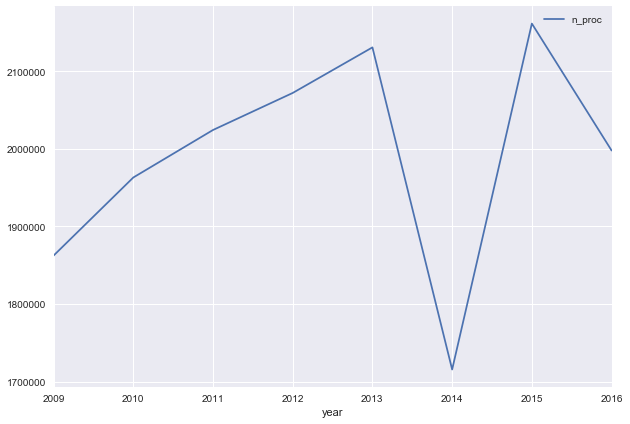

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# plot number of EKG performed in a period 2009-2016 
plot = df_year.plot(x ='year', y ='n_proc', figsize=(10, 7))
fig = plot.get_figure()
fig.savefig('data_2009_2016.png')

In [8]:
# prepare training variable
X = np.array(df_year["year"])
X = X.reshape(-1,1)
y = np.array(df_year["n_proc"])

In [9]:
#display training variable
X

array([[2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]], dtype=int64)

In [11]:
#display target variable
y

array([1862393, 1962989, 2024214, 2071940, 2130648, 1715625, 2161318,
       1997804], dtype=int64)

In [12]:
#prepare prediciting variable
z = np.array([i+2016 for i in range (1,10)])
z = z.reshape(-1,1)

In [13]:
# prepare linear model
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predictions = lm.predict(z)
# show predicitions
print(predictions)

[ 2048319.75        2061087.16666667  2073854.58333334  2086622.
  2099389.41666667  2112156.83333334  2124924.25        2137691.66666667
  2150459.08333334]


In [14]:
#print R^2
lm.score(X,y)

0.045835623805929981

In [15]:
# create dataframes with all predicted and training data
all_X = pd.DataFrame(np.concatenate((X, z), axis=0), columns=['year'])
all_y = pd.DataFrame(np.concatenate((y, predictions)), columns=['n_proc'])

In [16]:
# Add target variable
all_X['n_proc'] = all_y

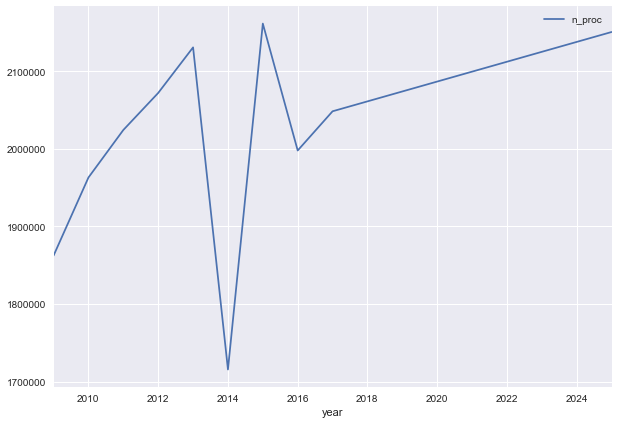

In [17]:
# Plot gathered data and linear predictions
plot = all_X.plot(x ='year', y ='n_proc', figsize=(10, 7))
fig = plot.get_figure()
fig.savefig('prediction_from_2017.png')

### There are some strange results for 2014, that could be caused by exogenous factors. Below will be the model build on data from 2009-2013 period. 

In [18]:
# prepare prediction variables
z = np.array([i + 2013 for i in range (1, 10)])
z = z.reshape(-1, 1)

In [19]:
# build model
lm = linear_model.LinearRegression()
model = lm.fit(X[:-3],y[:-3])
# display predictions
predictions = lm.predict(z)
print(predictions)

[ 2204075.09999999  2268621.2         2333167.3         2397713.40000001
  2462259.5         2526805.59999999  2591351.7         2655897.8
  2720443.90000001]


In [20]:
# check R^2 score
lm.score(X[:-3],y[:-3])

0.9781773644110846

In [21]:
# create dataframes with all predicted and training data
all_X = pd.DataFrame(np.concatenate((X[:-3], z), axis=0), columns=['year'])
all_y = pd.DataFrame(np.concatenate((y[:-3], predictions)), columns=['n_proc'])

In [22]:
# Add target variable
all_X['n_proc'] = all_y

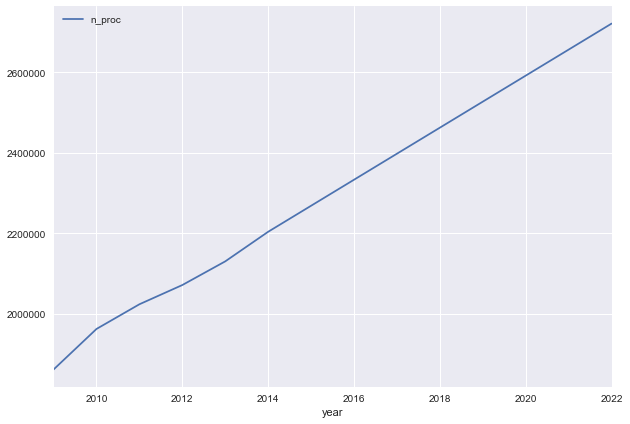

In [23]:
# Plot gathered data and linear predictions
plot = all_X.plot(x ='year', y ='n_proc', figsize=(10, 7))
fig = plot.get_figure()
fig.savefig('prediction_from_2014.png')

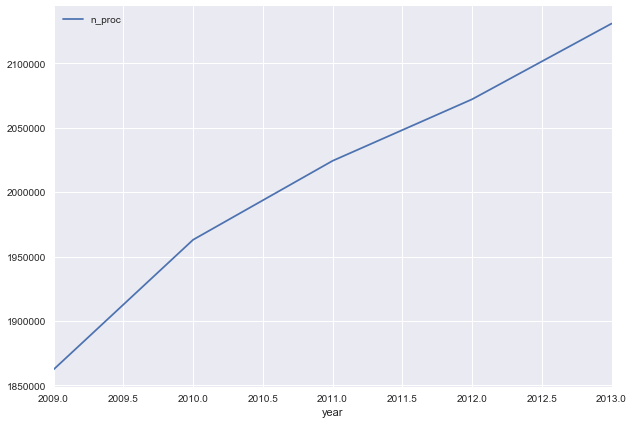

In [24]:
# plot only trainging data
plot = df_year[:-3].plot(x ='year', y ='n_proc', figsize=(10, 7))
fig = plot.get_figure()
fig.savefig('data_2009_2013.png')

### Thank you for reading!